In [7]:
from FlagEmbedding import FlagModel
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from pprint import pprint as pp

In [ ]:
model = FlagModel('BAAI/bge-large-en-v1.5', 
                  query_instruction_for_retrieval="",
                  use_fp16=True)

In [2]:
from datasets import load_dataset, load_from_disk

# random

In [11]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/random_with_base_{i}"))

In [12]:
print(datas[0])

Dataset({
    features: ['instruction', 'response', 'label', '__index_level_0__'],
    num_rows: 5100
})


In [13]:
embeddings = model.encode(datas[0]["instruction"])

Inference Embeddings: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


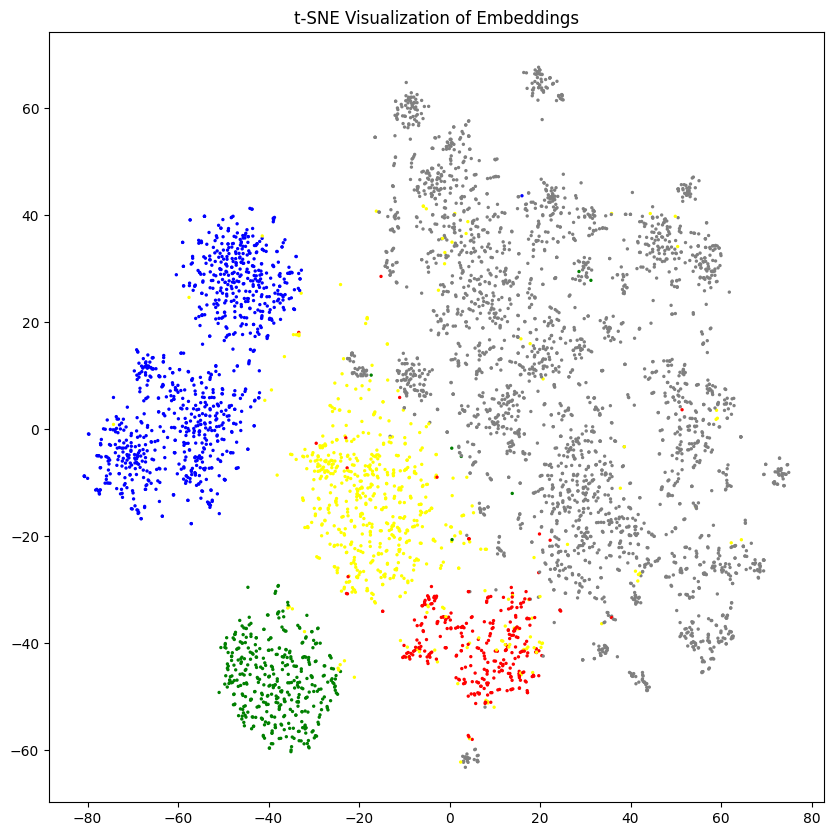

In [14]:
tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
tsne_results = tsne_model.fit_transform(embeddings)
colors = ["red","blue","green","yellow","grey"]
color_dict = {"code":"red","fin":"blue","med":"green","gen":"yellow","math":"grey"}
colors_list = [color_dict[label] for label in datas[0]["label"]]
plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_list, s=2)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

# pos

Inference Embeddings: 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]


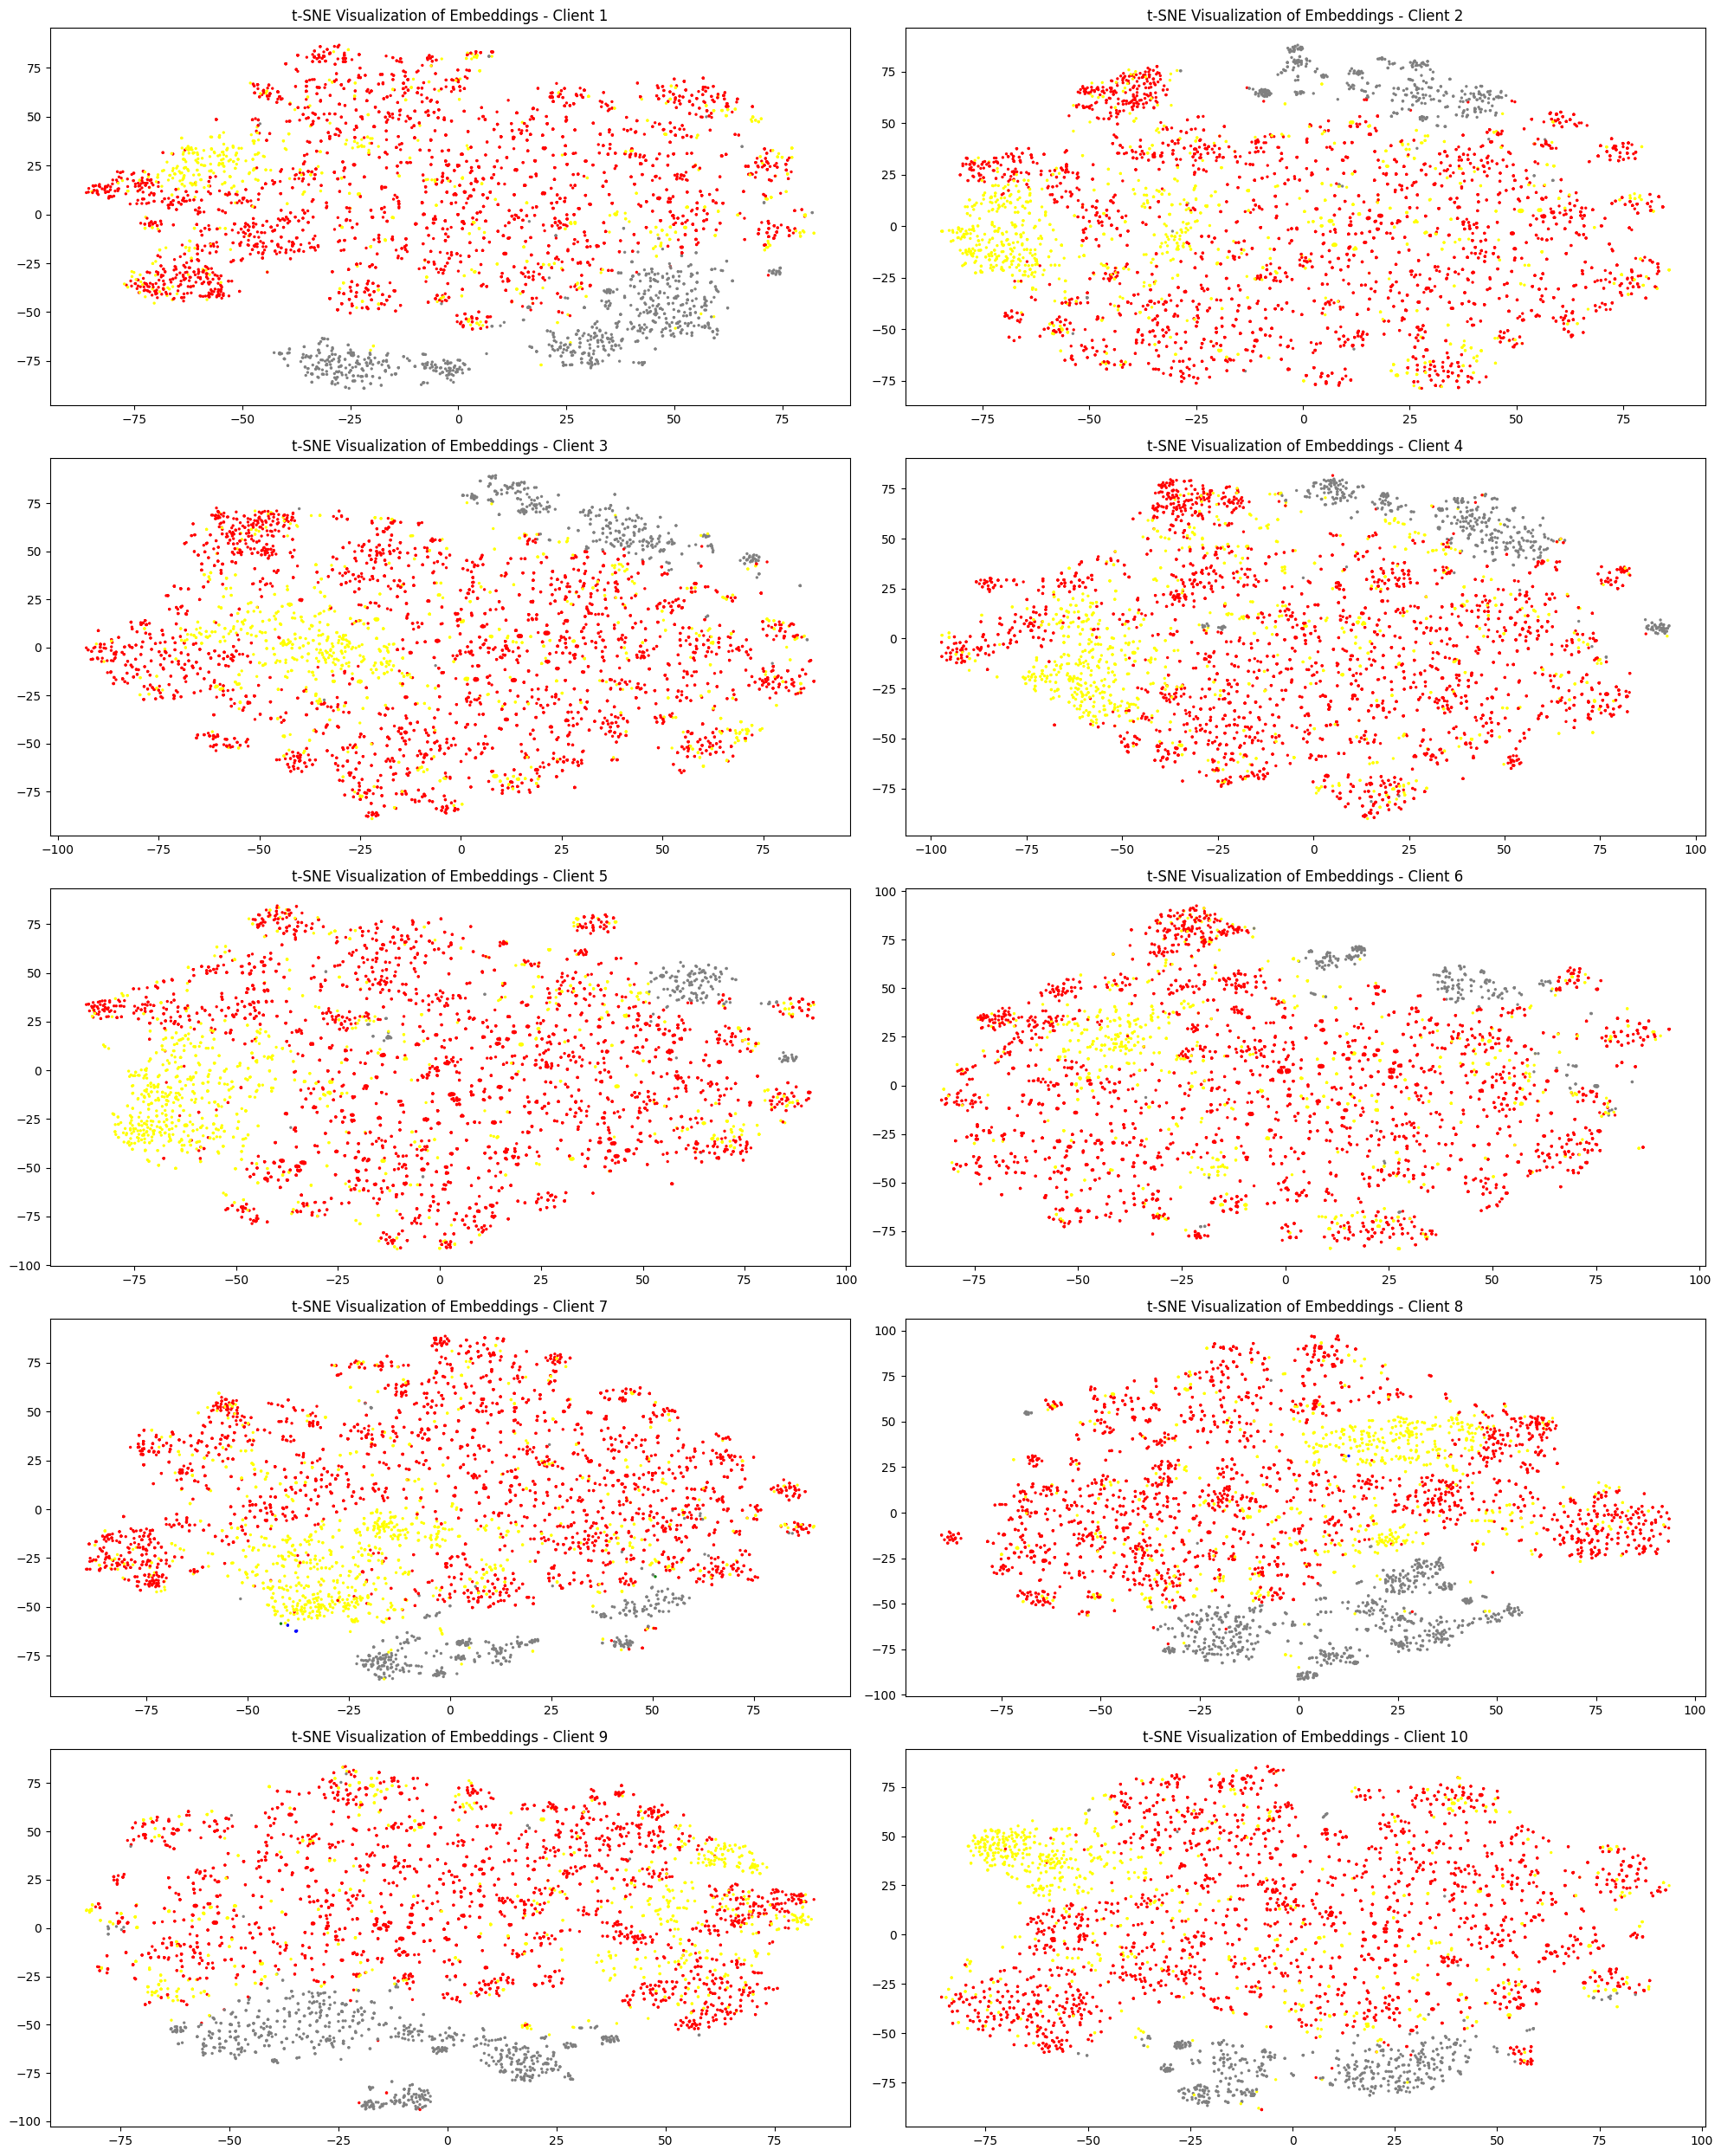

In [17]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/pos_{i}"))
# embeddings = model.encode(datas[0]["instruction"])
# tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
# tsne_results = tsne_model.fit_transform(embeddings)
# colors = ["red","blue","green","yellow","grey"]
# color_dict = {"code":"red","fin":"blue","med":"green","gen":"yellow","math":"grey"}
# colors_list = [color_dict[label] for label in datas[0]["label"]]
# plt.figure(figsize=(10, 10))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_list, s=2)
# plt.title('t-SNE Visualization of Embeddings')
# plt.show()

# 创建一个 2x5 的绘图网格
fig, axs = plt.subplots(5, 2, figsize=(20, 25))

# 遍历数据并进行 t-SNE 可视化
for i, data in enumerate(datas):
    embeddings = model.encode(data["instruction"])
    tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
    tsne_results = tsne_model.fit_transform(embeddings)
    # 获取颜色列表
    colors_list = [color_dict[label] for label in data["label"]]
    # 计算子图位置
    row = i // 2
    col = i % 2
    # 在对应的子图中绘制散点图
    axs[row, col].scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_list, s=2)
    axs[row, col].set_title(f't-SNE Visualization of Embeddings - Client {i+1}')
# 调整子图间距
plt.tight_layout()

# 展示所有子图
plt.show()

# neg

Inference Embeddings: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


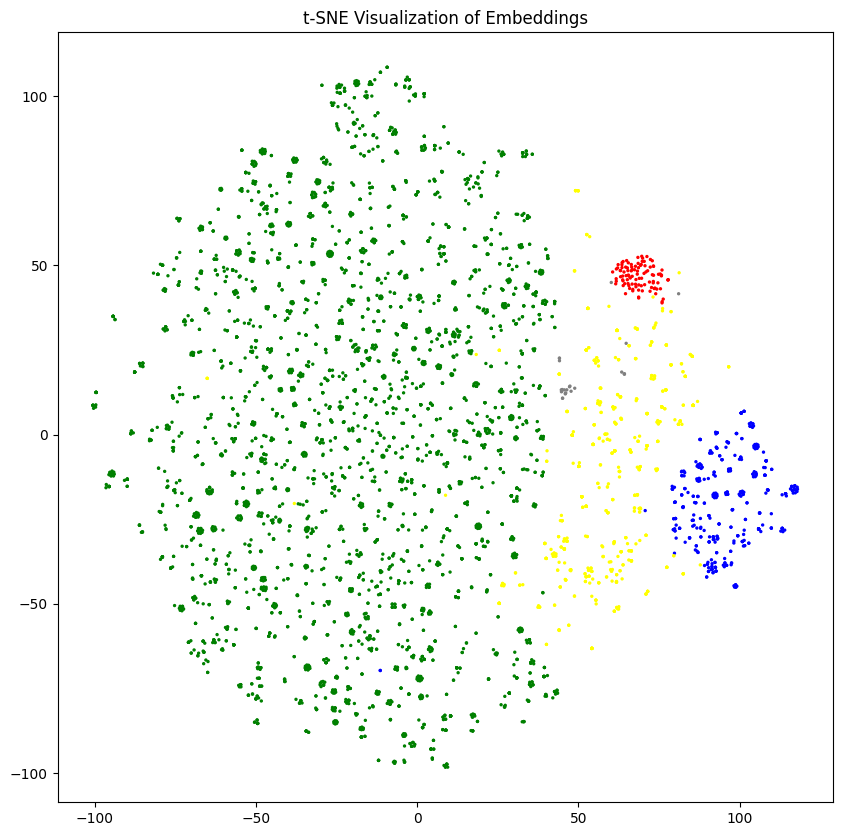

In [16]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/neg_{i}"))
embeddings = model.encode(datas[0]["instruction"])
tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
tsne_results = tsne_model.fit_transform(embeddings)
colors = ["red","blue","green","yellow","grey"]
color_dict = {"code":"red","fin":"blue","med":"green","gen":"yellow","math":"grey"}
colors_list = [color_dict[label] for label in datas[0]["label"]]
plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_list, s=2)
plt.title('t-SNE Visualization of Embeddings')
plt.show()